In [44]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc1_array

In [45]:
# path = './data/Occupancy/PhaseAdj_Scan_QInj=400K/'    ## 400k
# path = './data/Occupancy/PhaseAdj_Scan_QInj=1M25/'    ## 1.25 Mhz
# path = './data/Occupancy/PhaseAdj_Scan_QInj=2M5/'    ## 2.5 Mhz
# path = './data/Occupancy/PhaseAdj_Scan_QInj=5M/'    ## 5 Mhz
path = './data/Occupancy/PhaseAdj_Scan_QInj=10M/'    ## 10 Mhz
# path = './data/Occupancy/PhaseAdj_Scan_QInj=20M/'    ## 20 Mhz
file_in = 'Array_T_Pixel=15_DAC_P15=414_QSel=6_CLSel=0_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=044_B1_200000_07-13_14-47-52.dat'

datapath = os.listdir(path)
file_in = [item for item in datapath if item.split('.')[1]=='dat']

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
# qinj_base = 32       ##  1.25 MHz
# qinj_base = 8       ##  5 MHz
qinj_base = 4       ##  10 MHz
# qinj_base = 2       ##  20 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)



toa_list = []
toa_mu_list = []
toa_std_list = []
tot_list = []
tot_mu_list = []
tot_std_list = []
cal_list = []
cal_mu_list = []
cal_std_list = []
hitposition_list = []
hitposition_mod_list = []
phase_list=[]
events_list = []
i=0
for item in tqdm(file_in):
    f_r = open(path+file_in[i], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
#     print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
#     print(lines[0])
#     print('hitflag is',lines[0].split()[3])
    
#     print(lines[0])
#     print('toa is',int(lines[0].split()[0]))
    
#     print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for m in range (0, num_lines):
        line_item = lines[m]
        if line_item.split()[3] == '1':
            toa += [int(line_item.split()[0])]
            tot += [int(line_item.split()[1])]
            cal += [int(line_item.split()[2])]
            hitposition += [m]
            hitposition_mod += [m%qinj_base]
            events = events + 1
    
    toa_mu = np.mean(toa)
    toa_std = np.std(toa)
    tot_mu = np.mean(tot)
    tot_std = np.std(tot)
    cal_mu = np.mean(cal)
    cal_std = np.std(cal)
    
    PhaseAdj = int(file_in[i].split("=")[7].split('_')[0])
    
    toa_list.append(toa)
    toa_mu_list.append(toa_mu)
    toa_std_list.append(toa_std)
    tot_list.append(tot)
    tot_mu_list.append(tot_mu)
    tot_std_list.append(tot_std)
    cal_list.append(cal)
    cal_mu_list.append(cal_mu)
    cal_std_list.append(cal_std)
    hitposition_list.append(hitposition)
    hitposition_mod_list.append(hitposition_mod)
    phase_list.append(PhaseAdj)
    events_list.append(events)
    
    i += 1
        
#     print('toa[0:5] is', toa[0:5])
#     print('tot[0:5] is', tot[0:5])
#     print('cal[0:5] is', cal[0:5])
#     print('hitposition[0:5] is', hitposition[0:5])
#     print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
num_bin = None

print(phase_list)

    


[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


50000
length of toa_list is 110
length of hitposition_List is 110
phase list is 50
events_list is [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000]


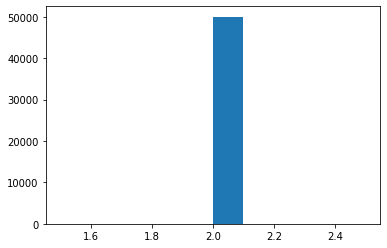

In [46]:
qinj_base = 32       ##  1.25 MHz
print(len(hitposition_mod_list[98]))
plt.hist(hitposition_mod_list[98])

print('length of toa_list is',len(toa_list))
print('length of hitposition_List is', len(hitposition_list))
# print('hitposition_list is', hitposition_list[105])
print('phase list is', phase_list[0])
# print('toa_list is',toa_list[0])
# print('toa std list is',toa_std_list)
print('events_list is',events_list)
# print(hitposition_mod_list[1])


[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 5

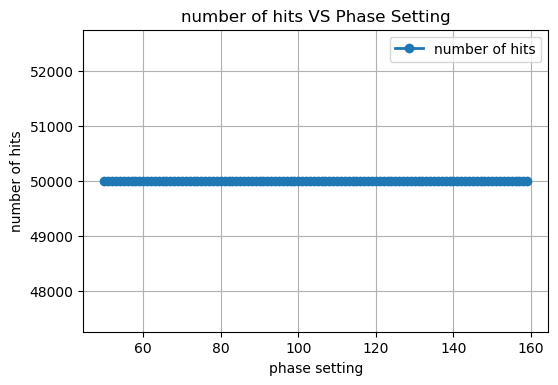

toa_std_list_np is [0.5685059  0.52591283 0.54753212 0.58281213 0.53444101 0.48176294
 0.61252635 0.59904564 0.41527621 0.57002779 0.60808431 0.47492558
 0.49152542 0.67217716 0.53001342 0.46233118 0.62359585 0.62325176
 0.45647459 0.60342194 0.59963135 0.5104714  0.47143149 0.58714479
 0.57492568 0.46245631 0.57231085 0.37670379 0.50224832 0.58065023
 0.5880718  0.54826016 0.55967511 0.64613971 0.46835845 0.56072689
 0.58071594 0.54743705 0.49728385 0.62386568 0.58407396 0.47441568
 0.59809543 0.57035656 0.54312447 0.60526549 0.61452725 0.56809563
 0.50572264 0.59818904 0.36999762 0.54817388 0.58820878 0.56367522
 0.42767048 0.61496767 0.56650641 0.47231718 0.63607929 0.40560779
 0.53453281 0.61467942 0.57062457 0.42339984 0.64530019 0.64394072
 0.44399052 0.62599638 0.60036389 0.5780255  0.45539863 0.52217258
 0.63421031 0.53726672 0.7057797  0.55474189 0.47483285 0.51806455
 0.59657753 0.64160721 0.41320041 0.54220822 0.61512024 0.48528094
 0.65923883 0.57151556 0.52172624 0.6503576

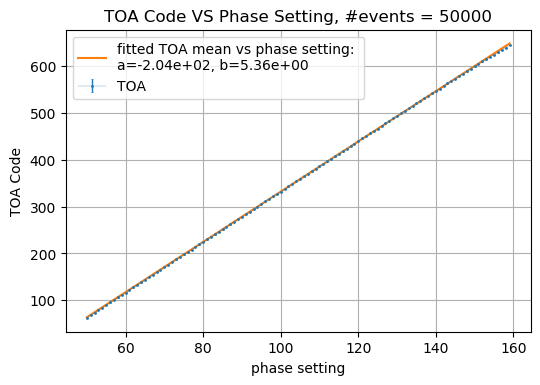

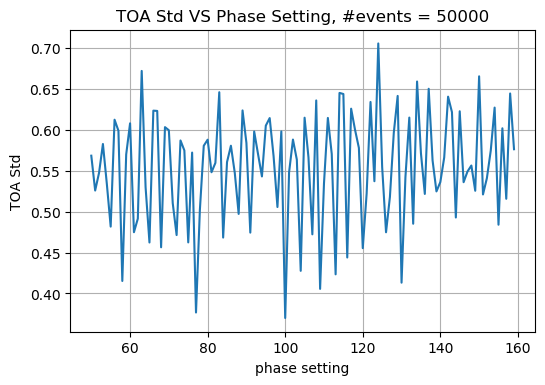

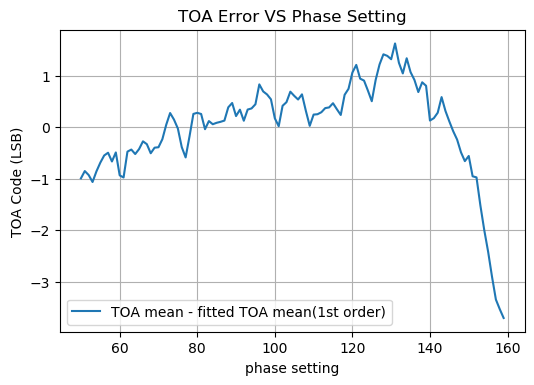

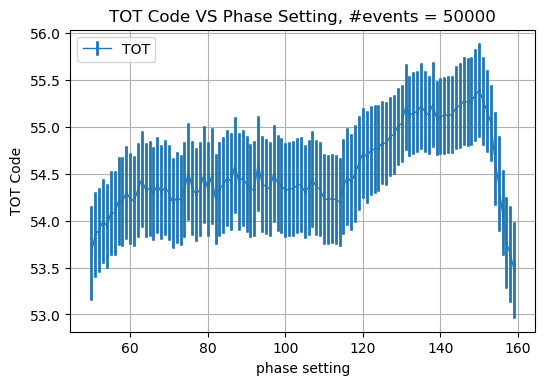

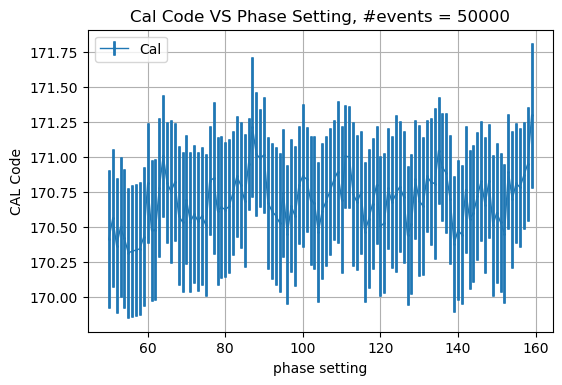

In [47]:
print(phase_list)
print(events_list)

pp = PdfPages(path+"20200909_phasescan"+".pdf")

#######################  plot  ############################################
######### Plot events  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.plot(phase_list, events_list, 'o-', linewidth=2, label='number of hits', )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='number of hits',
       title='number of hits VS Phase Setting')
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)



phase_list_np = np.array(phase_list)
toa_mu_list_np = np.array(toa_mu_list)
toa_std_list_np = np.array(toa_std_list)
popt_toa, pcov_toa = curve_fit(etroc1_array.func1, phase_list_np, toa_mu_list_np)
popt_toa0, pcov_toa0 = curve_fit(etroc1_array.func0, phase_list_np, toa_mu_list_np)
print('toa_std_list_np is',toa_std_list_np)

######### Plot TOA Code  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.errorbar(phase_list, toa_mu_list, toa_std_list,label='TOA',
             elinewidth=1, linewidth=0.2, capthick=0.5, capsize=0.5, markersize=1, marker='o')
# ax1.plot(phase_list_np, etroc1_array.func1(phase_list_np, *popt_toa), 
#          label='fitted TOA mean vs phase setting: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa))
ax1.plot(phase_list_np, etroc1_array.func0(phase_list_np, *popt_toa0), 
         label='fitted TOA mean vs phase setting: \na=%5.2e, b=%5.2e' % tuple(popt_toa0))
# ax1.plot(phase_list_np, toa_mu_list_np, 
#          label='fitted TOA mean vs phase setting: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa))
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOA Code',
       title='TOA Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot TOA STD  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.plot(phase_list_np, toa_std_list_np)
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOA Std',
       title='TOA Std VS Phase Setting, #events = %d'%(events))
# ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot TOA Code error  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.plot(phase_list_np, toa_mu_list_np - etroc1_array.func0(phase_list_np, *popt_toa0), '-',
         label='TOA mean - fitted TOA mean(1st order)')
# ax1.plot(phase_list_np, toa_mu_list_np - etroc1_array.func1(phase_list_np, *popt_toa), '-',
#          label='TOA mean - fitted TOA mean(3rd order polynomial)')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOA Code (LSB)',
       title='TOA Error VS Phase Setting')
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot TOT Code  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.errorbar(phase_list, tot_mu_list, tot_std_list,label='TOT',
             elinewidth=2, linewidth=1, capthick=0.5, capsize=0.5, markersize=1, marker='o')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOT Code',
       title='TOT Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)

######### Plot CAL Code  ##############
fig, ax1 = plt.subplots(dpi=100)
ax1.errorbar(phase_list, cal_mu_list, cal_std_list,label='Cal',
             elinewidth=2, linewidth=1, capthick=0.5, capsize=0.5, markersize=1, marker='o')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='CAL Code',
       title='Cal Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)

pp.close()